In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [284]:
uber_data = pd.read_csv("/Users/sravyajonnalagadda/Downloads/UberDataset.csv")
uber_data.head(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [286]:
uber_data.shape

(1156, 7)

In [288]:
uber_data.head(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [290]:
uber_data.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [314]:

uber_data['PURPOSE'].fillna("NOT", inplace=True)
uber_data['CATEGORY'].fillna("NOT", inplace=True)



/var/folders/sr/zc3hn7lx04s9p2q0ht2v_2qr0000gp/T/ipykernel_1815/240523608.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uber_data['PURPOSE'].fillna("NOT", inplace=True)
/var/folders/sr/zc3hn7lx04s9p2q0ht2v_2qr0000gp/T/ipykernel_1815/240523608.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [316]:
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'],errors='coerce')

In [318]:
from datetime import datetime
 
uber_data['date'] = pd.DatetimeIndex(uber_data['START_DATE']).date
uber_data['time'] = pd.DatetimeIndex(uber_data['START_DATE']).hour

#changing into categories of day and night
uber_data['day-night'] = pd.cut(x=uber_data['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])

In [320]:
uber_data.dropna(inplace=True)

In [322]:
uber_data.drop_duplicates(inplace = True)

In [324]:
obj = (uber_data.dtypes == 'object')
object_cols = list(obj[obj].index)
 
unique_values = {}
for col in object_cols:
  unique_values[col] = uber_data[col].unique().size
unique_values

{'END_DATE': 414,
 'CATEGORY': 2,
 'START': 108,
 'STOP': 112,
 'PURPOSE': 7,
 'date': 113}

/var/folders/sr/zc3hn7lx04s9p2q0ht2v_2qr0000gp/T/ipykernel_1815/68358566.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CATEGORY', data=uber_data, palette='Set2')
/var/folders/sr/zc3hn7lx04s9p2q0ht2v_2qr0000gp/T/ipykernel_1815/68358566.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PURPOSE', data=uber_data, palette='Set3')


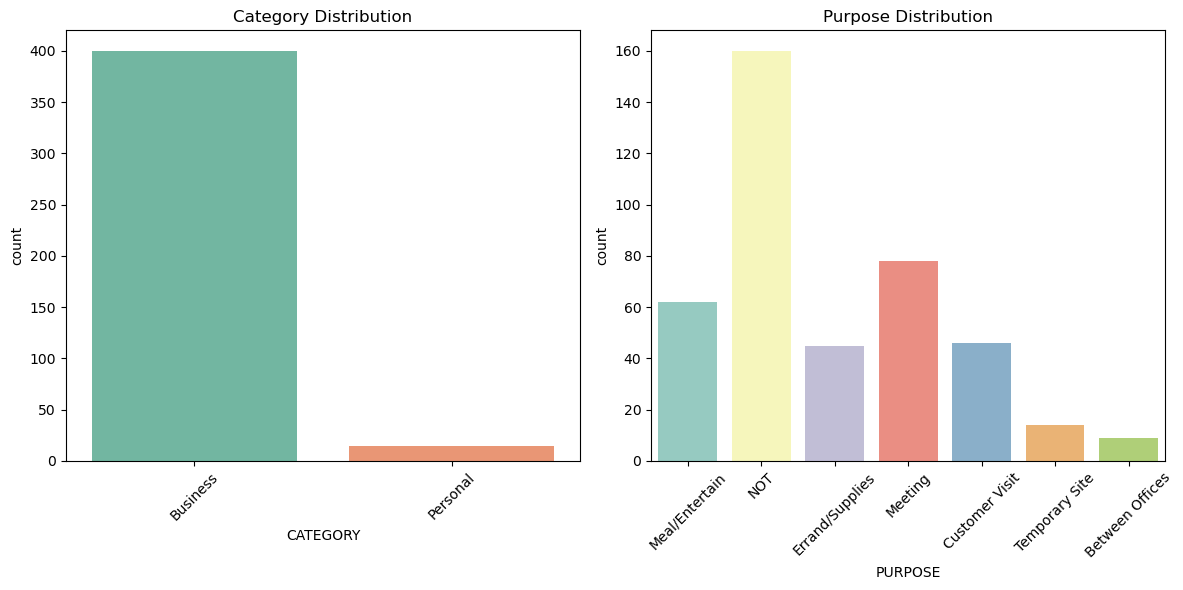

In [326]:
plt.figure(figsize=(12, 6))

# Subplot 1: Category Count Plot
plt.subplot(1, 2, 1)
sns.countplot(x='CATEGORY', data=uber_data, palette='Set2')
plt.title('Category Distribution')
plt.xticks(rotation=45)

# Subplot 2: Purpose Count Plot
plt.subplot(1, 2, 2)
sns.countplot(x='PURPOSE', data=uber_data, palette='Set3')
plt.title('Purpose Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


/var/folders/sr/zc3hn7lx04s9p2q0ht2v_2qr0000gp/T/ipykernel_1815/813652178.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day-night', data=uber_data, palette= 'deep')


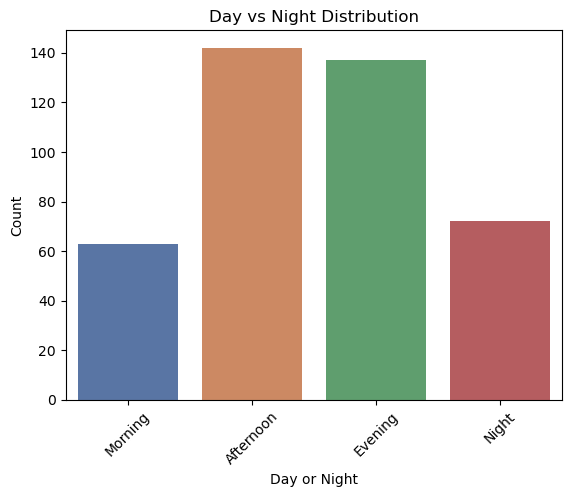

In [328]:
sns.countplot(x='day-night', data=uber_data, palette= 'deep')
plt.title('Day vs Night Distribution')
plt.xlabel('Day or Night')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.show()

In [330]:
uber_data.head(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night
1,2016-01-02 01:25:00,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1,Morning
2,2016-01-02 20:25:00,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night
3,2016-01-05 17:31:00,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening
4,2016-01-06 14:42:00,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon


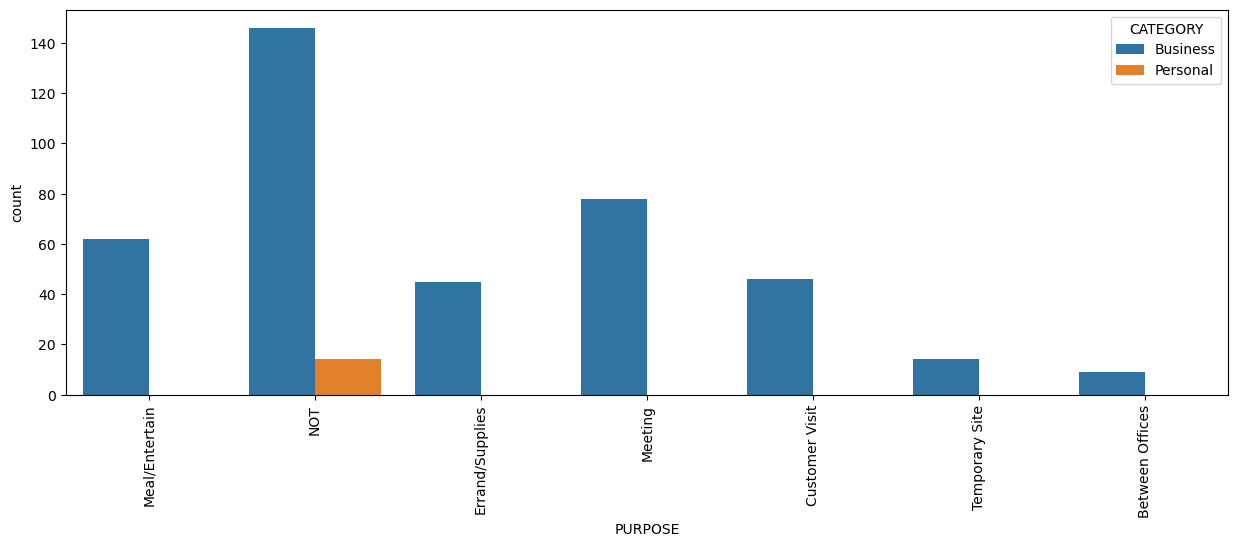

In [332]:
plt.figure(figsize=(15, 5))
sns.countplot(data=uber_data, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

## Insights from the above count-plots : 
Most of the rides are booked for business purpose.
Most of the people book cabs for Meetings and Meal / Entertain purpose.
Most of the cabs are booked in the time duration of 10am-5pm (Afternoon).


In [335]:
from sklearn.preprocessing import OneHotEncoder
object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse_output=False)  # Updated parameter name
OH_cols = pd.DataFrame(OH_encoder.fit_transform(uber_data[object_cols]))
OH_cols.index = uber_data.index
OH_cols.columns = OH_encoder.get_feature_names_out(object_cols)  # Updated method name
df_final = uber_data.drop(object_cols, axis=1)
uber_data = pd.concat([df_final, OH_cols], axis=1)


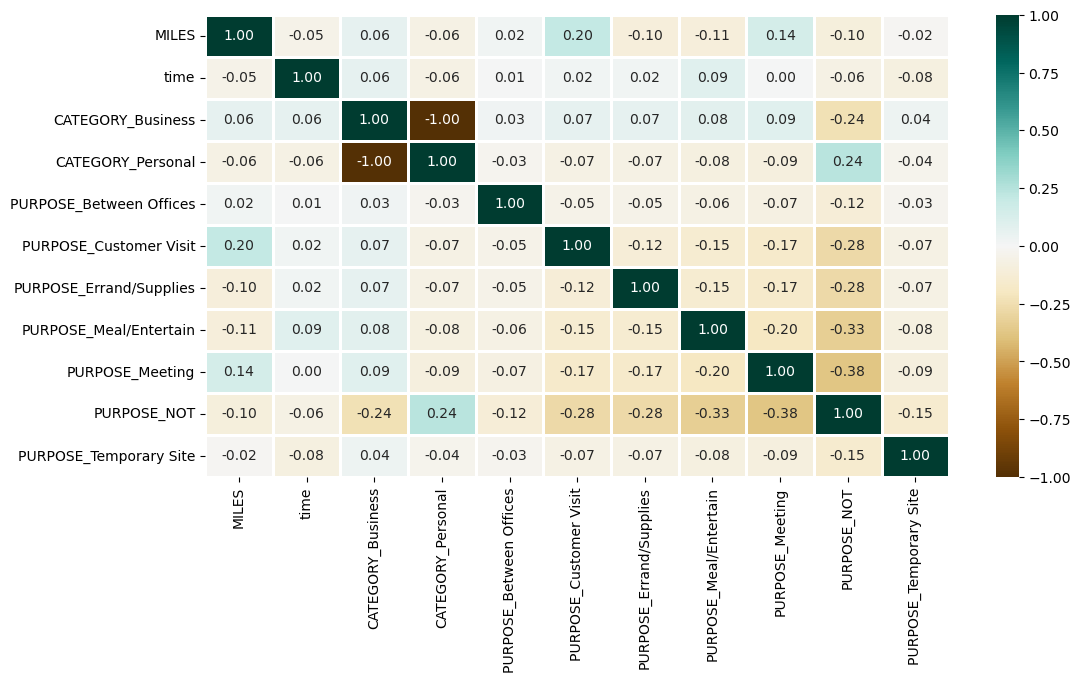

In [337]:
# Select only numeric columns
numeric_cols = uber_data.select_dtypes(include=['number'])

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_cols.corr(), 
            cmap='BrBG', 
            fmt='.2f', 
            linewidths=2, 
            annot=True)
plt.show()


## Insights from the heatmap:
Business and Personal Category are highly negatively correlated, this have already proven earlier. So this plot, justifies the above conclusions.
There is not much correlation between the features.

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

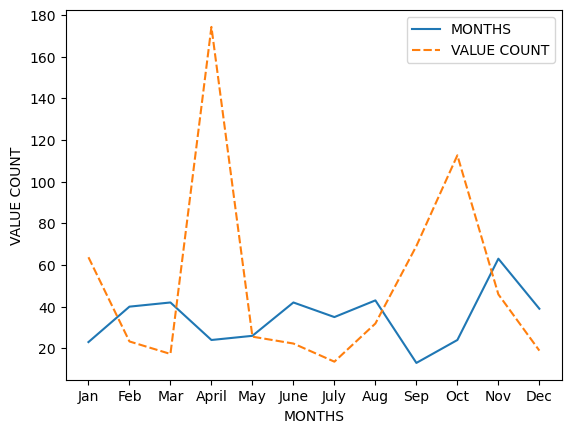

In [340]:
uber_data['MONTH'] = pd.DatetimeIndex(uber_data['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
uber_data["MONTH"] = uber_data.MONTH.map(month_label)
 
mon = uber_data.MONTH.value_counts(sort=False)
 
# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
                   "VALUE COUNT": uber_data.groupby('MONTH',
                                                  sort=False)['MILES'].max()})
 
p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

## Insights from the above plot : 
The counts are very irregular.
Still its very clear that the counts are very less during Nov, Dec, Jan, which justifies the fact that  time winters are there in Florida, US.

/var/folders/sr/zc3hn7lx04s9p2q0ht2v_2qr0000gp/T/ipykernel_1815/2478012620.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_label.index, y=day_label, palette= 'colorblind');


Text(0, 0.5, 'COUNT')

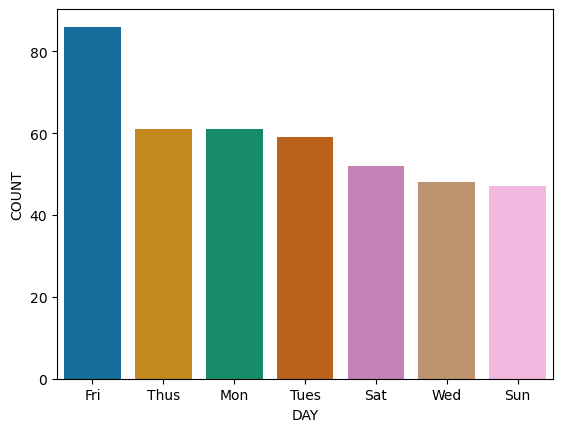

In [343]:
##Visualization for days data.

uber_data['DAY'] = uber_data.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
uber_data['DAY'] = uber_data['DAY'].map(day_label)


day_label = uber_data.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label, palette= 'colorblind');
plt.xlabel('DAY')
plt.ylabel('COUNT')

<Axes: ylabel='MILES'>

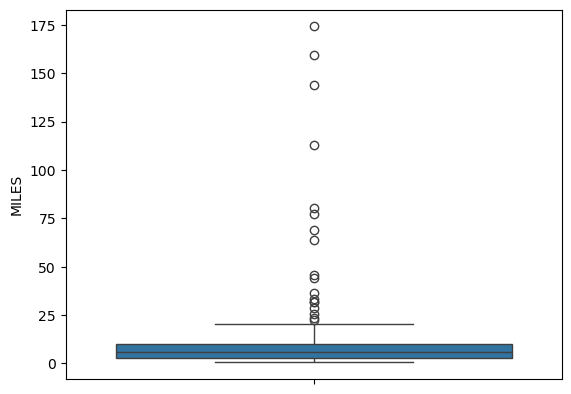

In [345]:
## Now, let’s explore the MILES Column .
## We can use boxplot to check the distribution of the column.

sns.boxplot(uber_data['MILES'])

<Axes: ylabel='MILES'>

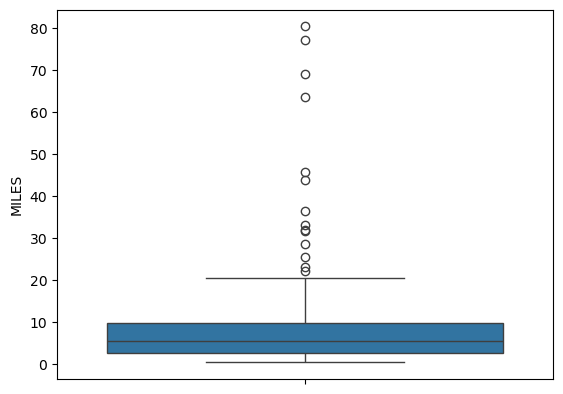

In [347]:
## As the graph is not clearly understandable. Let’s zoom in it for values lees than 100.


sns.boxplot(uber_data[uber_data['MILES']<100]['MILES'])

<Axes: ylabel='MILES'>

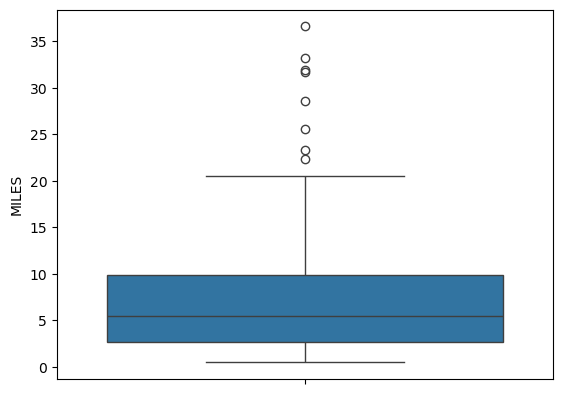

In [349]:
## It’s bit visible. But to get more clarity we can use distplot for values less than 40.

sns.boxplot(uber_data[uber_data['MILES']<40]['MILES'])

/var/folders/sr/zc3hn7lx04s9p2q0ht2v_2qr0000gp/T/ipykernel_1815/2311477560.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uber_data[uber_data['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

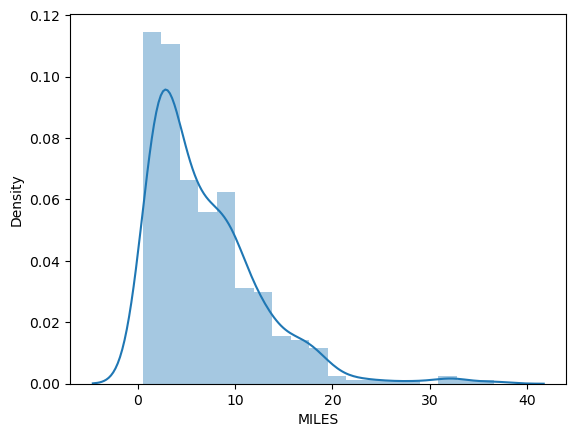

In [351]:
sns.distplot(uber_data[uber_data['MILES']<40]['MILES'])

## Insights from the above plots :
Most of the cabs booked for the distance of 4-5 miles.
Majorly people chooses cabs for the distance of 0-20 miles.
For distance more than 20 miles cab counts is nearly negligible.